<a href="https://colab.research.google.com/github/Danangadh/REPO4_ML/blob/main/REPO4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports and Setup
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')  # Ensure backend is set when imported using the whole matplotlib module
%matplotlib inline

import seaborn as sns

# Sklearn modules for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# For any potential permutation importance plots
from sklearn.inspection import permutation_importance

# Set plot style for consistency
sns.set(style='whitegrid')

print('Imports are complete.')

Imports are complete.


In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
import pandas as pd

# Path ke file di Google Drive
file_path = "/content/drive/My Drive/contentml/college_student_management_data.csv"

# Baca file CSV
df = pd.read_csv(file_path)

# Data Exploration

In [6]:
# Print the shape of the dataset
print('Dataset shape:', df.shape)

# Display the first few rows
print('First 5 rows of the dataset:')
display(df.head())

# Display dataset info to check datatypes and non-null values
print('Dataset info:')
df.info()

# If numeric summary is needed
display(df.describe())

Dataset shape: (1545, 15)
First 5 rows of the dataset:


,student_id,age,gender,major,GPA,course_load,avg_course_grade,attendance_rate,enrollment_status,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate,risk_level
0,S001,24,Other,Computer Science,2.42,5,67.2,0.71,Graduated,32,33,0.70,8,0.74,High
1,S002,21,Male,Arts,3.73,6,64.4,0.84,Leave,29,53,0.91,13,0.85,Medium
2,S003,22,Male,Computer Science,2.80,3,95.3,0.89,Graduated,34,69,0.58,18,0.99,Medium
3,S004,24,Male,Arts,2.59,4,73.7,0.98,Graduated,22,18,0.91,6,0.72,Medium
4,S005,20,Other,Computer Science,2.30,4,87.4,0.95,Active,9,11,0.77,15,0.76,High


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   student_id                    1545 non-null   object 
 1   age                           1545 non-null   int64  
 2   gender                        1545 non-null   object 
 3   major                         1545 non-null   object 
 4   GPA                           1545 non-null   float64
 5   course_load                   1545 non-null   int64  
 6   avg_course_grade              1545 non-null   float64
 7   attendance_rate               1545 non-null   float64
 8   enrollment_status             1545 non-null   object 
 9   lms_logins_past_month         1545 non-null   int64  
 10  avg_session_duration_minutes  1545 non-null   int64  
 11  assignment_submission_rate    1545 non-null   float64
 12  forum_participation_count     1545 non-null   in

,age,GPA,course_load,avg_course_grade,attendance_rate,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,21.482848,3.012324,4.487379,79.914887,0.794460,19.344984,49.365049,0.752201,9.642718,0.750958
std,2.300287,0.571395,1.098163,11.528625,0.115142,11.515003,23.195192,0.144351,5.752493,0.144840
min,18.000000,2.000000,3.000000,60.000000,0.600000,0.000000,10.000000,0.500000,0.000000,0.500000
25%,19.000000,2.520000,4.000000,69.900000,0.690000,10.000000,29.000000,0.630000,5.000000,0.620000
50%,22.000000,3.030000,5.000000,79.600000,0.790000,19.000000,49.000000,0.760000,10.000000,0.750000
75%,23.000000,3.510000,5.000000,89.700000,0.890000,29.000000,70.000000,0.880000,15.000000,0.880000
max,25.000000,4.000000,6.000000,100.000000,1.000000,39.000000,89.000000,1.000000,19.000000,1.000000


# Data Cleaning dan Preprocessing

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
display(missing_values)

# If missing values are found, here is an example strategy to fill or drop them
if missing_values.sum() > 0:
    # For numeric columns, you might fill missing values with median
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].median(), inplace=True)

    # For categorical columns, fill with a placeholder
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col].fillna('Unknown', inplace=True)
    print('Missing values were handled.')
else:
    print('No missing values detected.')

# Convert any necessary types if needed (e.g., categorical encoding) - currently the data types seem appropriate.

Missing values in each column:


,0
student_id,0
age,0
gender,0
major,0
GPA,0
course_load,0
avg_course_grade,0
attendance_rate,0
enrollment_status,0
lms_logins_past_month,0


No missing values detected.


# Data Visualization

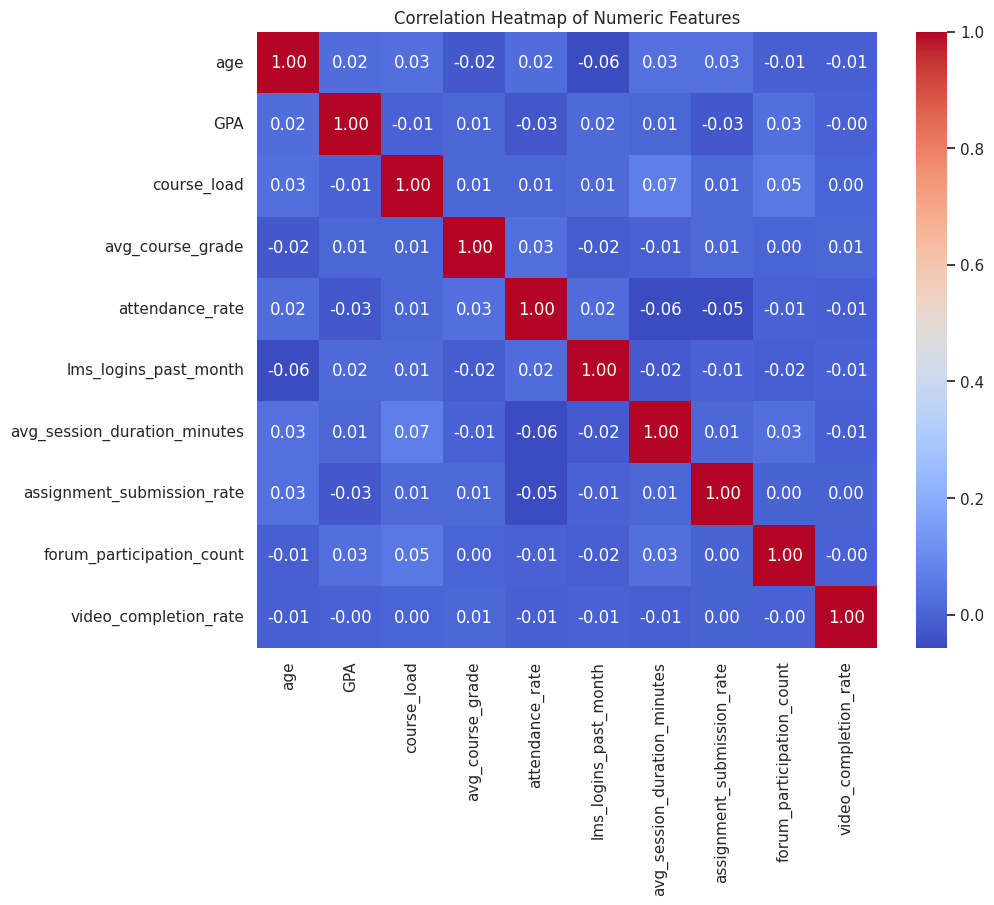

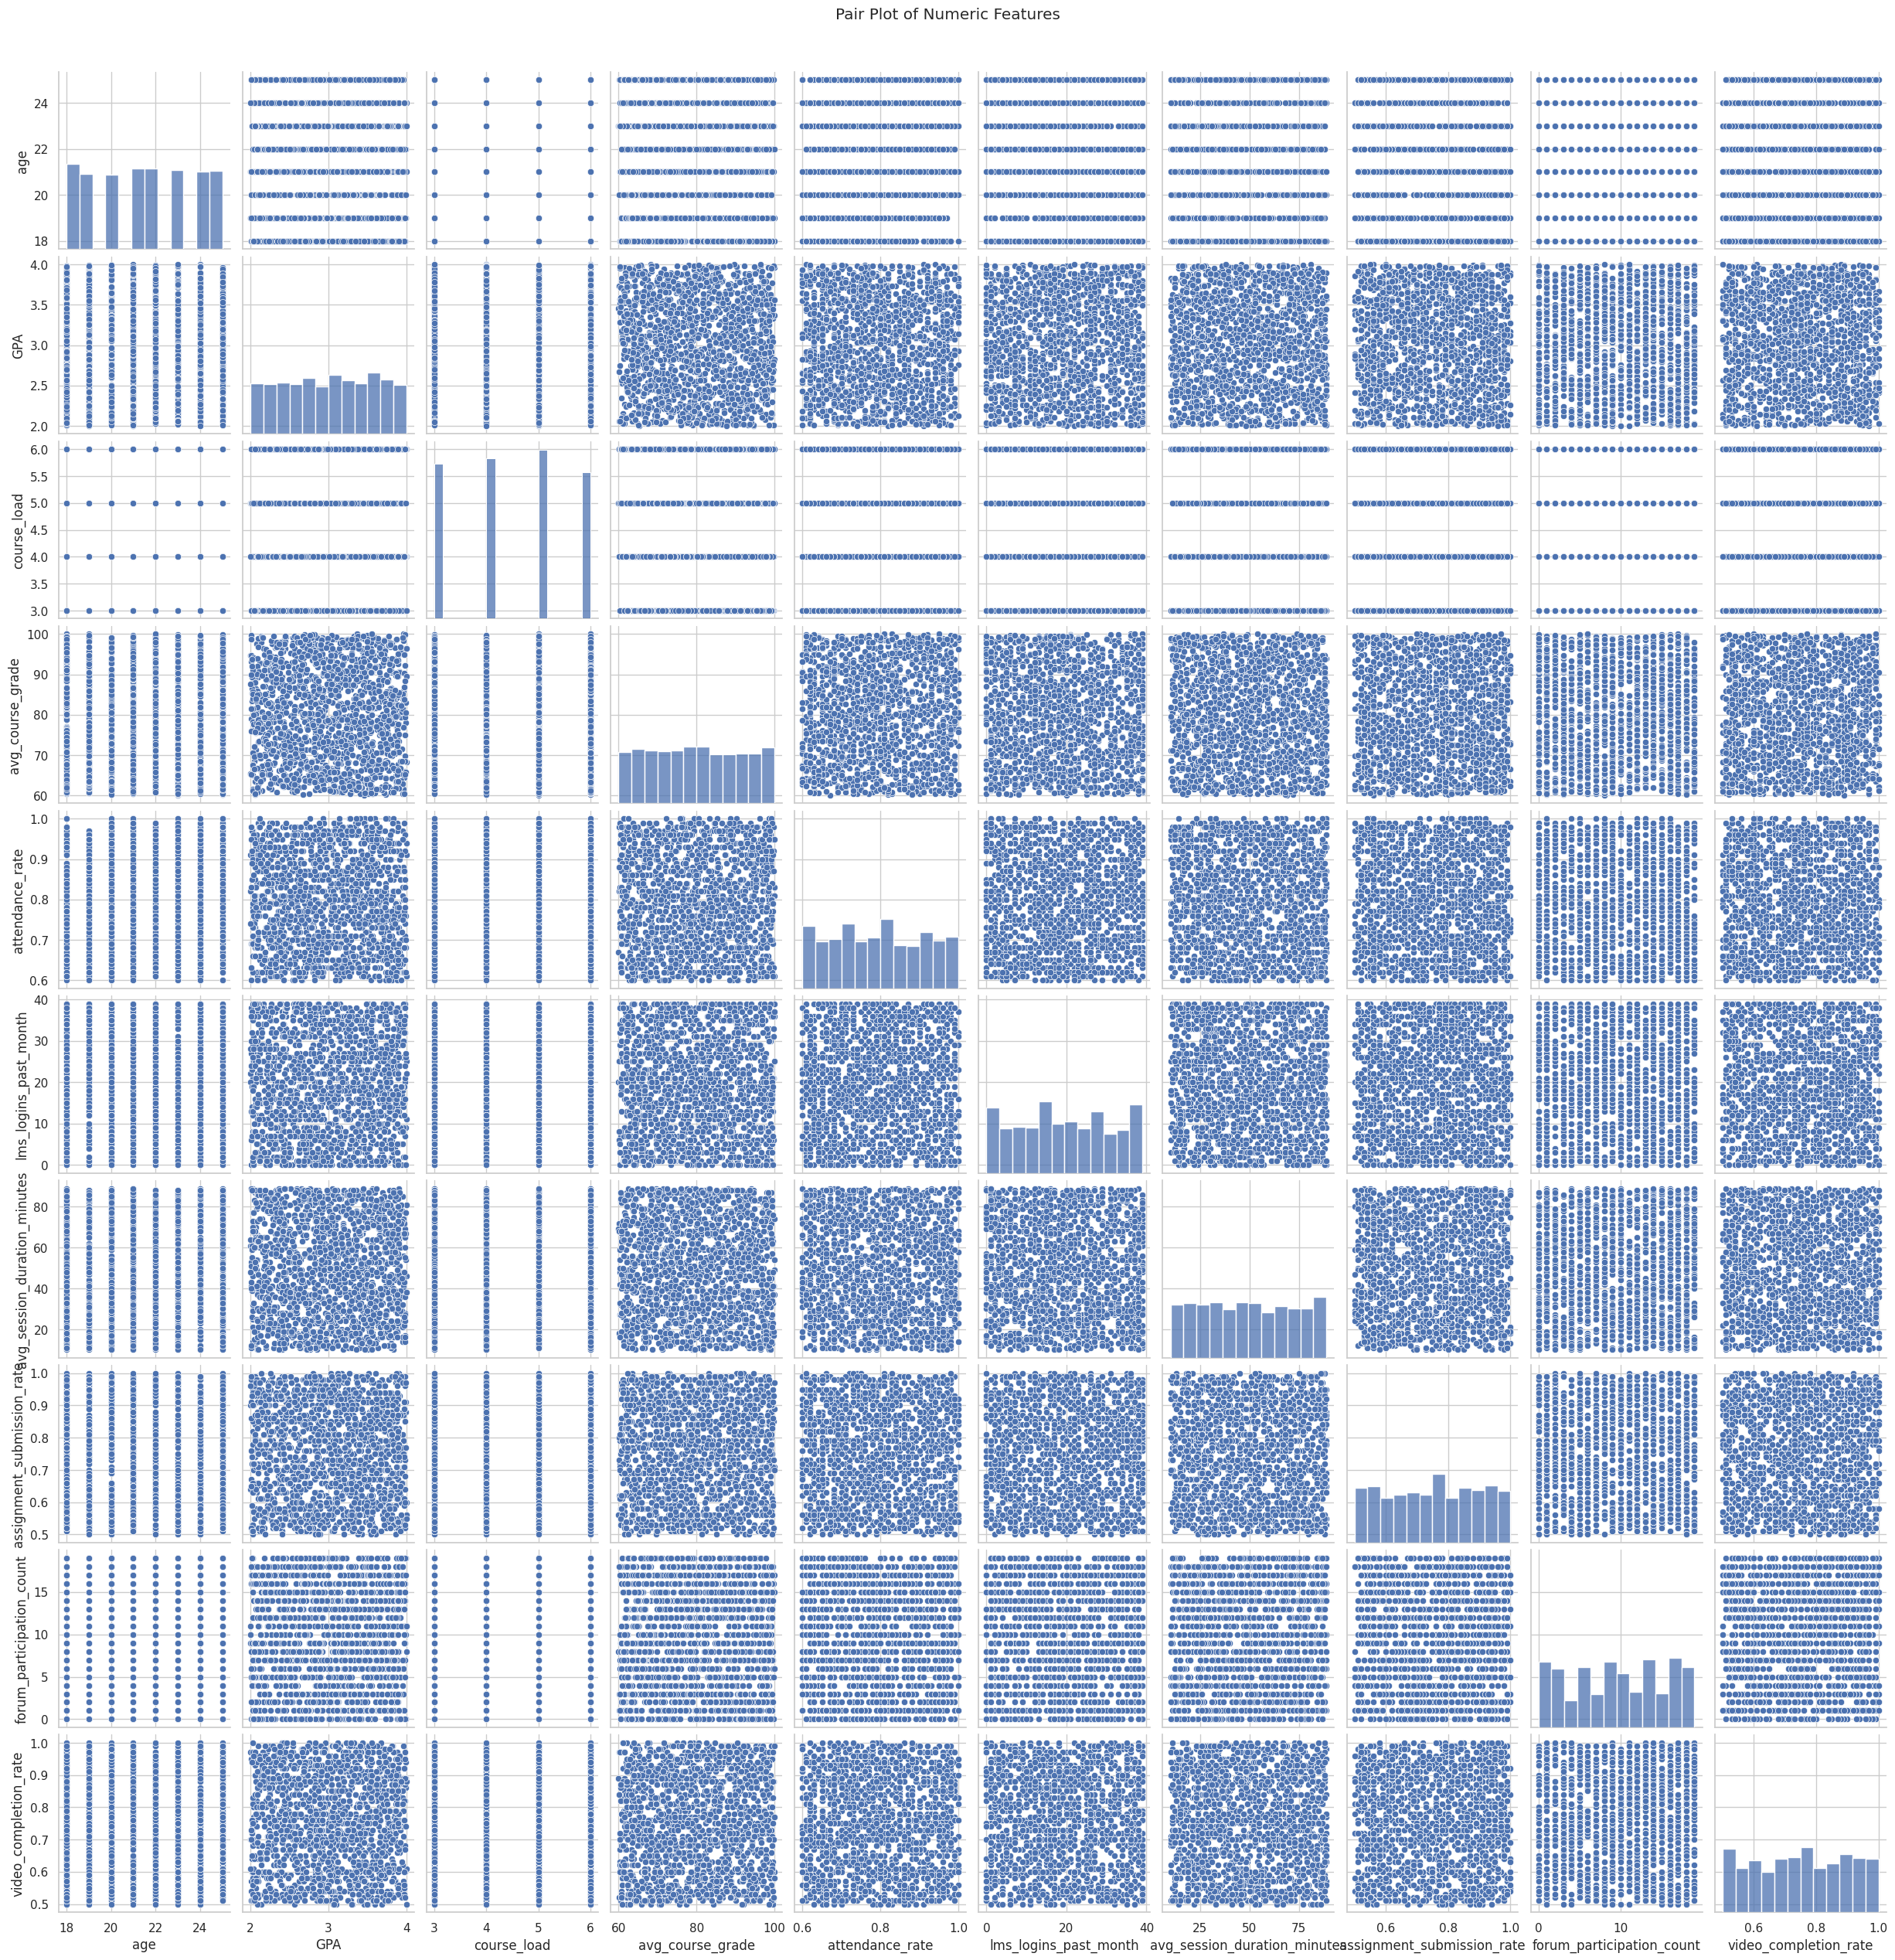

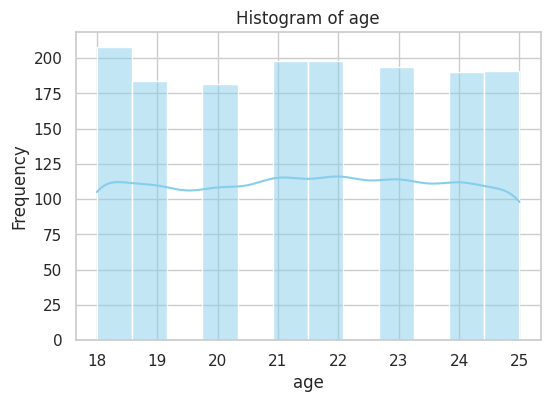

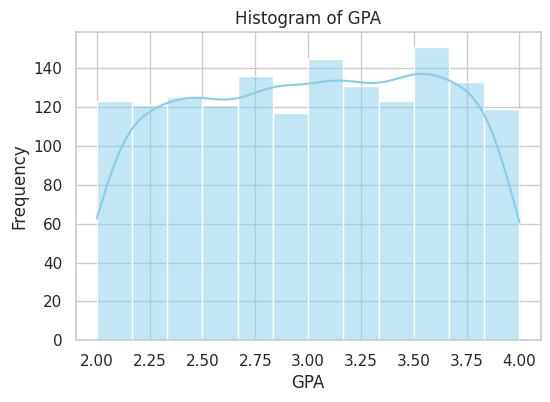

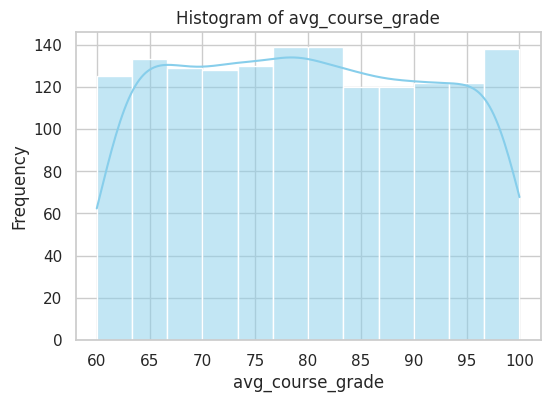

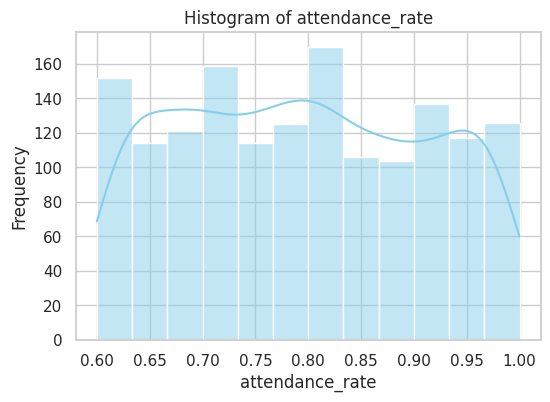

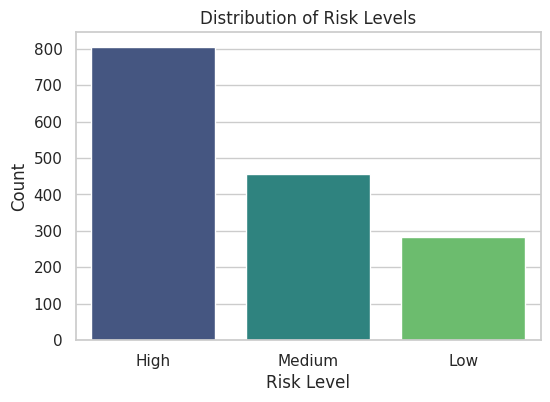

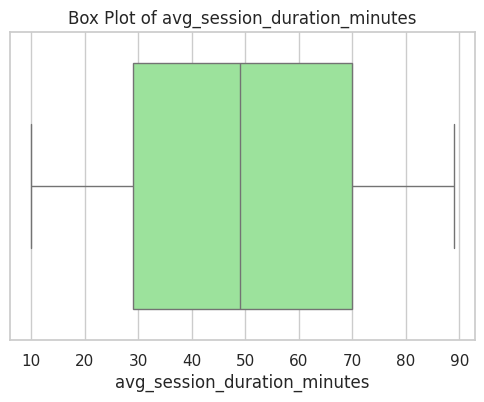

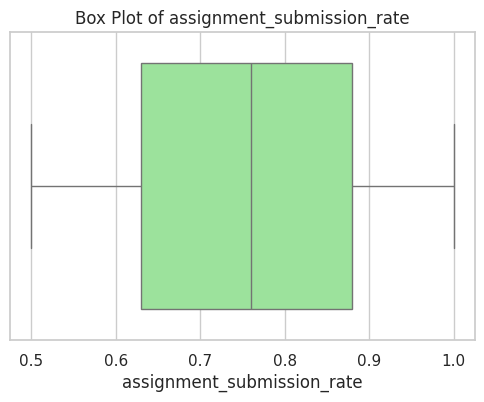

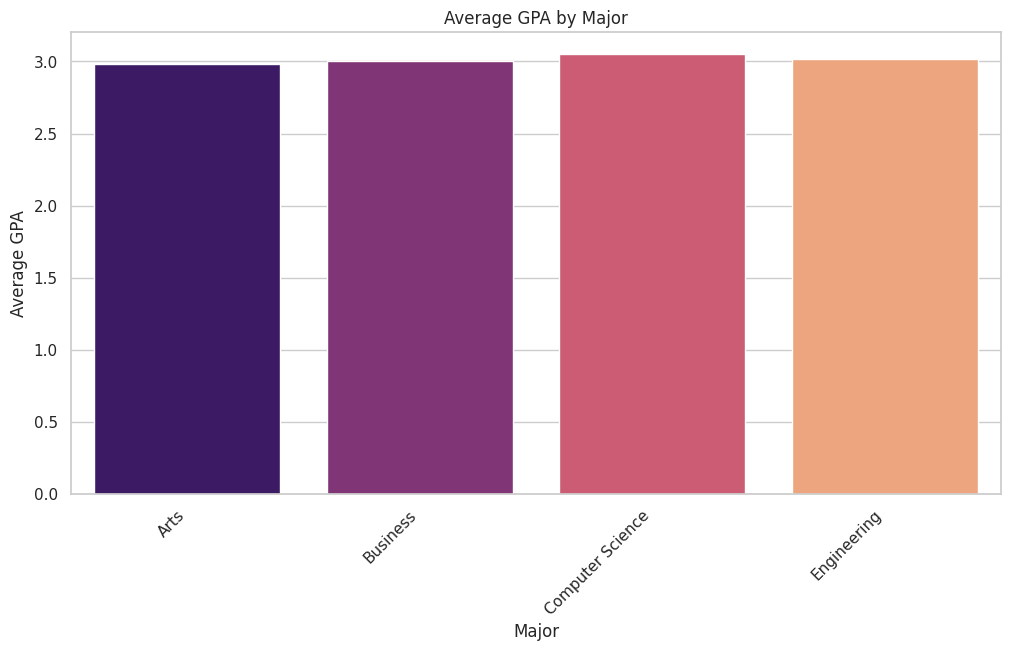

In [8]:
# 1. Heatmap of numeric feature correlations, if there are at least 4 numeric columns
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

# 2. Pair Plot of numeric features
if numeric_df.shape[1] > 1:
    sns.pairplot(numeric_df)
    plt.suptitle('Pair Plot of Numeric Features', y=1.02)
    plt.show()

# 3. Histogram distributions for key numeric columns
for col in ['age', 'GPA', 'avg_course_grade', 'attendance_rate']:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], kde=True, color='skyblue')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# 4. Count plot for categorical variable 'risk_level'
if 'risk_level' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='risk_level', data=df, palette='viridis')
    plt.title('Distribution of Risk Levels')
    plt.xlabel('Risk Level')
    plt.ylabel('Count')
    plt.show()

# 5. Box Plot for average session duration and assignment submission rate
for col in ['avg_session_duration_minutes', 'assignment_submission_rate']:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f'Box Plot of {col}')
        plt.xlabel(col)
        plt.show()

# 6. Grouped Barplot: Average GPA by major (if major column is present)
if 'major' in df.columns and 'GPA' in df.columns:
    plt.figure(figsize=(12, 6))
    avg_gpa_by_major = df.groupby('major')['GPA'].mean().reset_index()
    sns.barplot(x='major', y='GPA', data=avg_gpa_by_major, palette='magma')
    plt.title('Average GPA by Major')
    plt.xlabel('Major')
    plt.ylabel('Average GPA')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Predictive Modeling

Prediction Accuracy: 1.00


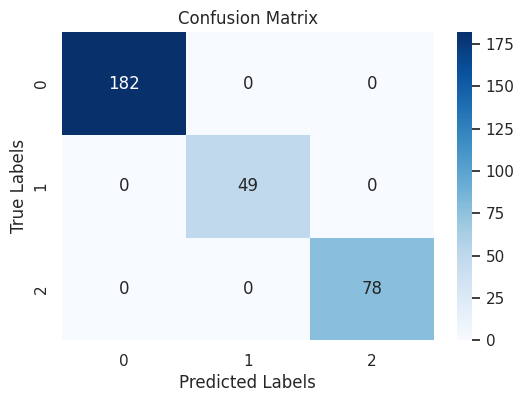

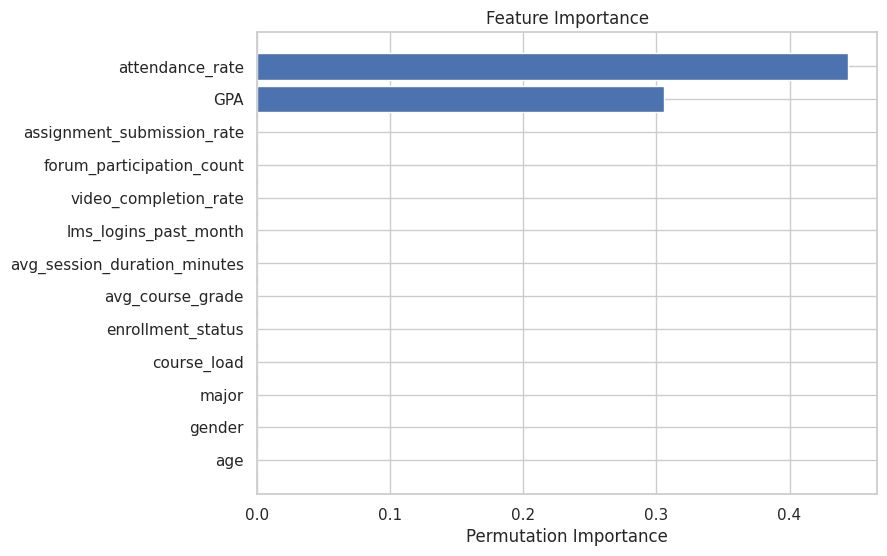

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        78

    accuracy                           1.00       309
   macro avg       1.00      1.00      1.00       309
weighted avg       1.00      1.00      1.00       309



In [9]:
# Copy the dataframe for modeling purposes
model_df = df.copy()

# We will predict 'risk_level'. We first need to encode categorical variables.
le = LabelEncoder()
if 'risk_level' in model_df.columns:
    model_df['risk_level_enc'] = le.fit_transform(model_df['risk_level'])
else:
    raise ValueError('The target variable risk_level is missing.')

# For modeling, choose features. We drop columns that are identifiers or non-informative.
features_to_drop = ['student_id', 'risk_level', 'risk_level_enc']
feature_cols = [col for col in model_df.columns if col not in features_to_drop]

# For any remaining categorical features, apply label encoding
for col in feature_cols:
    if model_df[col].dtype == 'object':
        model_df[col] = le.fit_transform(model_df[col])

X = model_df[feature_cols]
y = model_df['risk_level_enc']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions and calculate the accuracy score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy: {accuracy:.2f}')

# Display a confusion matrix using seaborn heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Optional: Permutation Importance
perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.show()

# Print classification report for more details
print('Classification Report:')
print(classification_report(y_test, y_pred))